# Assignment 3(due on 11/22)

## Student:南星宇（12332302），Gtihub：Lazarus302722
## 批改人：张鹏


## 得分：56/60

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

## 1. Niño 3.4 index

In [2]:
#1.1
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc', engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [8]:
# Calculate the climatology 
Nino=ds.sel(lon=slice(190,240), lat=slice(-5,5))
SST=Nino.sst.groupby('time.month')
#Anomaly

SSTa=SST-SST.mean(dim='time')
SSTa
Idx=SSTa.mean(dim=('lat','lon'))

Idx

<xarray.DataArray 'sst' (time: 684)>
array([-3.1957984e-01, -4.6852136e-01, -2.6815218e-01, -1.8696745e-01,
       -1.7759636e-01, -3.5768992e-01, -1.4197068e-01,  1.4657872e-02,
       -1.5222043e-01, -3.7986514e-01, -3.6089247e-01, -2.0869622e-01,
       -1.9147430e-01, -1.3428515e-01, -2.4037480e-01, -1.8512812e-01,
        5.1916372e-02,  2.3938322e-01, -7.0339397e-02, -4.1869378e-01,
       -7.7831775e-01, -7.9238480e-01, -4.9628872e-01, -4.1730934e-01,
       -4.4478282e-01, -4.5594049e-01, -4.3603396e-01, -4.6692902e-01,
       -5.6453085e-01, -4.2688489e-01, -2.7672547e-01, -3.1720972e-01,
       -6.7316109e-01, -6.6611850e-01, -8.1770629e-01, -8.6548859e-01,
       -7.0140064e-01, -3.5703859e-01,  6.9625296e-02,  1.7339660e-01,
       -9.0669163e-02,  7.6916955e-02,  6.8764049e-01,  7.9526329e-01,
        7.1297574e-01,  8.3424962e-01,  9.0853900e-01,  1.0858847e+00,
        8.5155445e-01,  5.2339661e-01, -1.3054201e-01, -6.3436538e-01,
       -8.6198235e-01, -9.4594681e-01, -7.8417778e-01, -1.0943437e+00,
       -1.2545164e+00, -1.1898344e+00, -1.2919568e+00, -1.2047966e+00,
       -7.8299785e-01, -3.6868739e-01, -1.1260075e-01, -7.6634012e-02,
        2.6837486e-01,  5.9115070e-01,  8.1201196e-01,  1.2380702e+00,
        1.2775931e+00,  1.5243515e+00,  1.5832040e+00,  1.4411814e+00,
        1.1759483e+00,  9.1274983e-01,  9.7401869e-01,  5.4807854e-01,
       -1.2716596e-01,  1.6879797e-01,  2.0798153e-01, -1.7554384e-01,
...
       -1.4300026e+00, -1.4566275e+00, -1.3759688e+00, -1.3508205e+00,
       -1.4731961e+00, -1.0574347e+00, -8.5620564e-01, -4.8650801e-01,
       -1.4349043e-01,  4.2982716e-02, -1.1235826e-01, -3.0135235e-01,
       -5.8117193e-01, -7.4650556e-01, -9.9722546e-01, -1.0019503e+00,
       -7.0119357e-01, -5.6635094e-01, -3.0147669e-01, -1.5211226e-01,
       -8.4630601e-02,  7.5953633e-02,  1.7238079e-01,  3.8049364e-01,
        8.3654034e-01,  6.2760067e-01,  4.9786237e-01, -3.8316193e-01,
       -6.9563270e-01, -5.4922789e-01, -3.6749738e-01,  9.5283233e-02,
       -3.9338361e-02, -2.3501316e-01, -2.6667309e-01, -2.9699394e-01,
       -2.1477483e-01, -8.1600435e-02, -1.5828373e-01, -3.9171723e-01,
       -5.3803706e-01, -6.7143130e-01, -3.8115814e-01,  2.2428645e-02,
        3.6434561e-01,  2.0831840e-01,  8.8038445e-02, -1.8357644e-03,
        2.5484514e-01,  5.1869166e-01,  8.6020625e-01,  7.2358847e-01,
        6.2317705e-01,  5.4424441e-01,  5.9339762e-01,  9.0459478e-01,
        1.0037961e+00,  1.1426607e+00,  1.4040657e+00,  1.6555315e+00,
        1.9147604e+00,  2.3238080e+00,  2.7023039e+00,  2.5217140e+00,
        2.4617841e+00,  2.1428695e+00,  1.6179831e+00,  1.1509792e+00,
        4.6409106e-01, -1.1223720e-01, -5.6739616e-01, -6.4774352e-01,
       -6.4002270e-01, -8.9667594e-01, -9.7077346e-01, -8.5526085e-01],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [4]:
Roll=Idx.rolling(time=3, center=True).mean()
Roll
df = pd.DataFrame(Idx.data,index=Idx.time.data,columns=['sst'])
df

,sst
1960-01-15,-0.319580
1960-02-15,-0.468521
1960-03-15,-0.268152
1960-04-15,-0.186967
1960-05-15,-0.177596
...,...
2016-08-15,-0.647744
2016-09-15,-0.640023
2016-10-15,-0.896676
2016-11-15,-0.970773


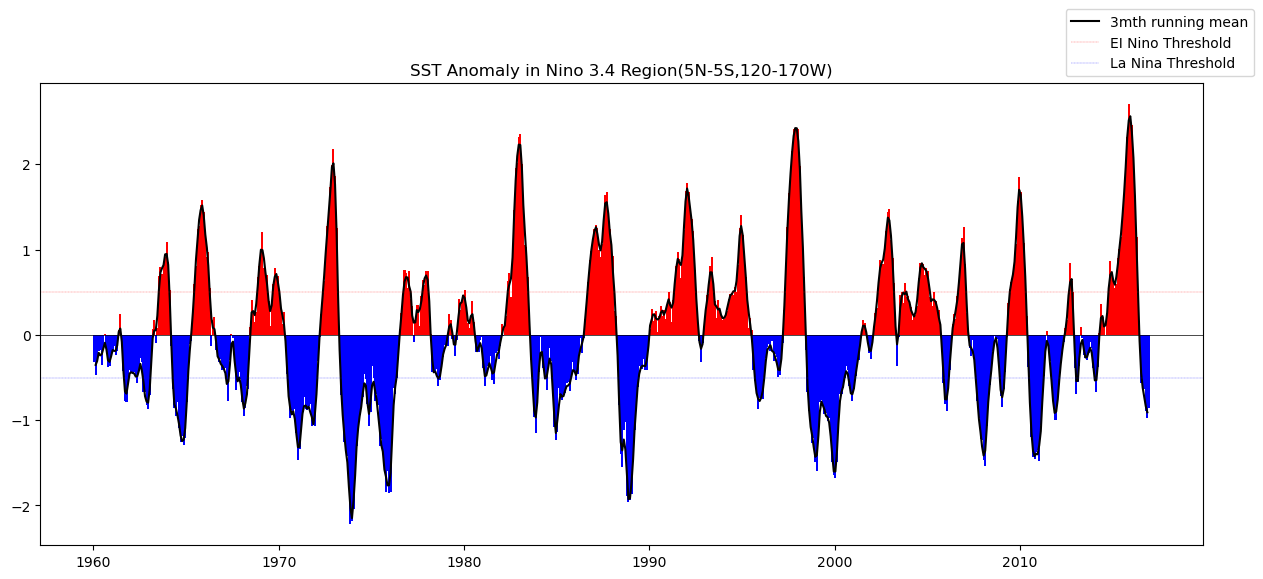

In [5]:
fig, ax = plt.subplots(figsize=(15,6))


colormat=np.where(df['sst']>0, 'r','b')

ax.bar(df.index, df['sst'], width=40, color=colormat)

ax.plot(Roll.time, Roll.data, color='k',label='3mth running mean')

plt.axhline(0, color='black', lw=0.5)
plt.axhline(y = 0.5, linewidth = 0.2, color = 'r', linestyle = '--', label = 'EI Nino Threshold')
plt.axhline(y = -0.5, linewidth = 0.2, color = 'b', linestyle = '--', label = 'La Nina Threshold')
plt.legend(loc = 'lower right',  bbox_to_anchor=(1.05, 1))

plt.title('SST Anomaly in Nino 3.4 Region(5N-5S,120-170W)')                 
plt.show()

### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容和详细的结果的分析。

### 得分：20/20
### --------------------------------------------------------------------------------------------

## 2. Earth’s energy budget

In [9]:
#Problem 2
ds = xr.open_dataset('CERES_EBAF-TOA_200003-201701.nc', engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

Text(0.5, 1.0, 'short wave')

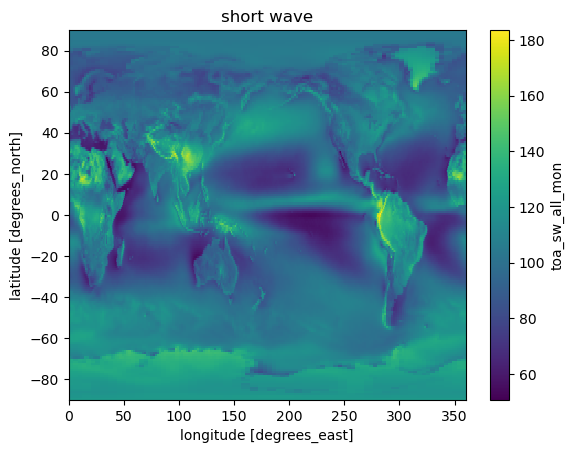

In [10]:
#2.1
ds.toa_sw_all_mon.mean(dim='time').plot()
plt.title('short wave')

Text(0.5, 1.0, 'long wave')

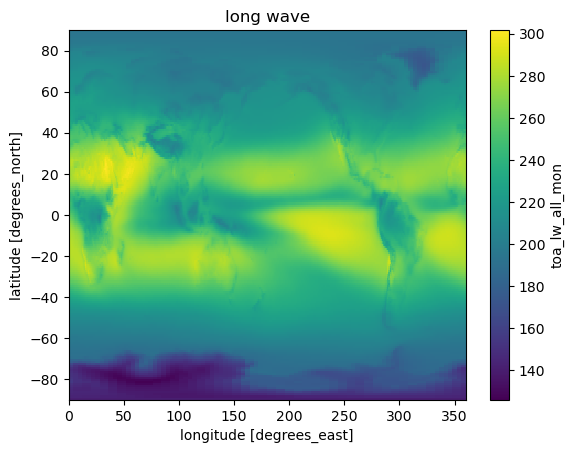

In [11]:
ds.toa_lw_all_mon.mean(dim='time').plot()
plt.title('long wave')

Text(0.5, 1.0, 'solar radiation')

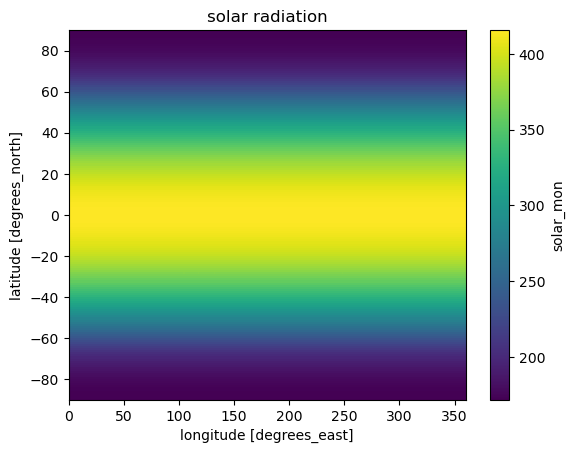

In [12]:
ds.solar_mon.mean(dim='time').plot()
plt.title('solar radiation')

Text(0.5, 1.0, 'Net flux')

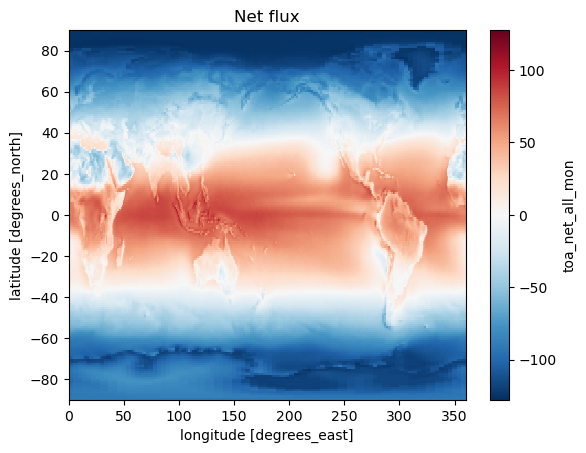

In [13]:
ds.toa_net_all_mon.mean(dim='time').plot()
plt.title('Net flux')

Text(0.5, 1.0, 'Add of three')

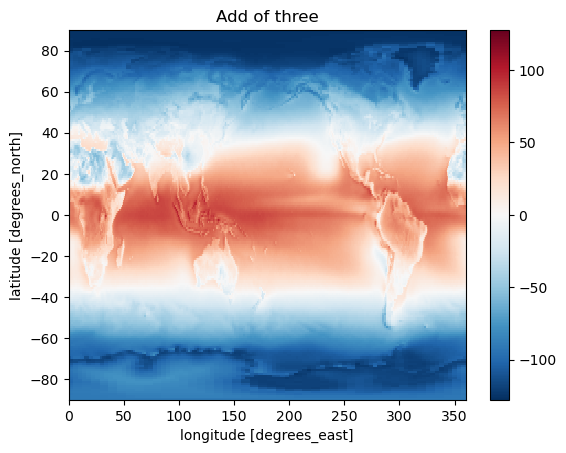

In [14]:
Add=ds.solar_mon.mean(dim='time')-ds.toa_lw_all_mon.mean(dim='time')-ds.toa_sw_all_mon.mean(dim='time')
Add.plot()
plt.title('Add of three')

In [16]:
#2.2
# TOA incoming solar
import math
Solar=ds.solar_mon.mean(dim='time')
Area=0
for i in range(0,180):
    Solar[i,:]=Solar[i,:] * math.cos((89.5-i)/180 *math.pi)
    Area= Area + 360 * math.cos((89.5-i)/180 *math.pi)
SolarFlux=Solar.sum()/Area
print(SolarFlux.values,'W·m^-2')

              

340.28511894386634 W·m^-2


In [17]:
LW=ds.toa_lw_all_mon.mean(dim='time')
Area=0
for i in range(0,180):
    LW[i,:]=LW[i,:] * math.cos((89.5-i)/180 *math.pi)
    Area= Area + 360 * math.cos((89.5-i)/180 *math.pi)
LWFlux=LW.sum()/Area
print(LWFlux.values,'W·m^-2')


240.26796852086974 W·m^-2


In [18]:
SW=ds.toa_sw_all_mon.mean(dim='time')
Area=0
for i in range(0,180):
    SW[i,:]=SW[i,:] * math.cos((89.5-i)/180 *math.pi)
    Area= Area + 360 * math.cos((89.5-i)/180 *math.pi)
SWFlux=SW.sum()/Area
print(SWFlux.values,'W·m^-2')


99.13903672837858 W·m^-2


Text(0.5, 1.0, 'Net per Lat')

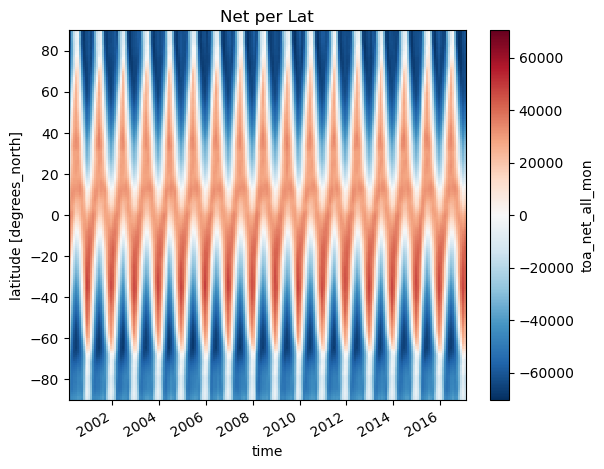

In [19]:
#2.3
net_perlat=ds.toa_net_all_mon.sum(dim=['lon'])
net_perlat.transpose().plot()
plt.title('Net per Lat')

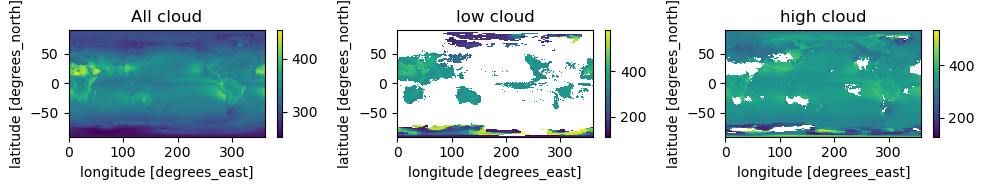

In [20]:
#2.4
fig, (ax1, ax2,ax3,) = plt.subplots(1,3, figsize=(10,2), sharey=False)
toa_lw_all_mon_all=ds.toa_lw_all_mon.mean(dim=['time'])
toa_sw_all_mon_all=ds.toa_sw_all_mon.mean(dim=['time'])
composites= toa_lw_all_mon_all+toa_sw_all_mon_all
composites.plot(ax=ax1)
ax1.set_title('All cloud')

toa_lw_all_mon_low=ds.where(ds.cldarea_total_daynight_mon<=25).toa_lw_all_mon.mean(dim=['time'])
toa_sw_all_mon_low=ds.where(ds.cldarea_total_daynight_mon<=25).toa_sw_all_mon.mean(dim=['time'])
composites_low= toa_lw_all_mon_low+toa_sw_all_mon_low
composites_low.plot(ax=ax2)
ax2.set_title('low cloud')

toa_lw_all_mon_high=ds.where(ds.cldarea_total_daynight_mon>=75).toa_lw_all_mon.mean(dim=['time'])
toa_sw_all_mon_high=ds.where(ds.cldarea_total_daynight_mon>=75).toa_sw_all_mon.mean(dim=['time'])
composites_high= toa_lw_all_mon_high+toa_sw_all_mon_high
composites_high.plot(ax=ax3)
ax3.set_title('high cloud')
plt.tight_layout()

In [21]:
weights = np.cos(np.deg2rad(ds.lat))
low = ds.cldarea_total_daynight_mon.mean(dim='time') <= 25
high = ds.cldarea_total_daynight_mon.mean(dim='time')  >= 75
sw_low_gm = ds.toa_sw_all_mon.where(low).weighted(weights).mean(dim=['lon','lat'])
sw_high_gm = ds.toa_sw_all_mon.where(high).weighted(weights).mean(dim=['lon','lat'])
lw_low_gm = ds.toa_lw_all_mon.where(low).weighted(weights).mean(dim=['lon','lat'])
lw_high_gm = ds.toa_lw_all_mon.where(high).weighted(weights).mean(dim=['lon','lat'])
time = lw_high_gm.time


sw_low_gm_t = ds.toa_sw_all_mon.where(low).weighted(weights).mean(dim=['lon','lat','time'])
sw_high_gm_t = ds.toa_sw_all_mon.where(high).weighted(weights).mean(dim=['lon','lat','time'])
lw_low_gm_t = ds.toa_lw_all_mon.where(low).weighted(weights).mean(dim=['lon','lat','time'])
lw_high_gm_t = ds.toa_lw_all_mon.where(high).weighted(weights).mean(dim=['lon','lat','time'])
print('Shortwave in Low Cloud:',sw_low_gm_t.values,'W·m^-2\n',
      'Shortwave in High Cloud:',sw_high_gm_t.values,'W·m^-2\n',
      'Longwave in low Cloud:',lw_low_gm_t.values,'W·m^-2\n',
      'longwave in High Cloud:',lw_high_gm_t.values,'W·m^-2')

Shortwave in Low Cloud: 122.5519 W·m^-2
 Shortwave in High Cloud: 109.20605 W·m^-2
 Longwave in low Cloud: 280.66214 W·m^-2
 longwave in High Cloud: 223.7661 W·m^-2


### 第二题代码运行正常，可以输出正确结果和图片，报告中也展示了输出内容和结果的分析。第三小问应当继续算出total amount总量，这里面涉及到了计算不同维度下的grid面积，最后辐射强度要跟面积相乘，单位：W。第四问没有分长波短波绘制高云低云的复合图。第五问没有回答What is the overall effect of clouds on shortwave and longwave radiation?
### 得分：27/30
### --------------------------------------------------------------------------------------------

## 3. Explore a netCDF dataset

In [26]:
ds=xr.open_dataset("CRUTEM.5.0.1.0.anomalies.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:         (time: 2085, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2023-09-16
  * latitude        (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tas             (time, latitude, longitude) float64 ...
    time_bnds       (time, bnds) datetime64[ns] ...
    latitude_bnds   (latitude, bnds) float64 ...
    longitude_bnds  (longitude, bnds) float64 ...
Attributes:
    comment:      CRUTEM5 air temperature at 2m
    history:      Data set built at: 2023-10-31T10:23:32+00:00
    institution:  Climatic Research Unit, University of East Anglia/Met Offic...
    licence:      CRUTEM5 is licensed under the Open Government Licence v3.0 ...
    reference:    Osborn, T. J., P. D. Jones, D. H. Lister, C. P. Morice, I. ...
    source:       
    title:        CRUTEM5 air temperature over land
    version:      CRUTEM.5.0.1.0
    Conventions:  CF-1.7

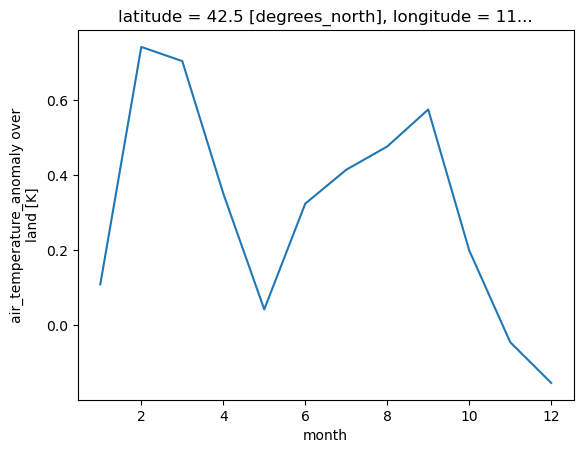

In [27]:
group_data=ds.tas.groupby('time.month').mean(dim='time')
group_data.sel(longitude=116,latitude=40,method='nearest').plot()

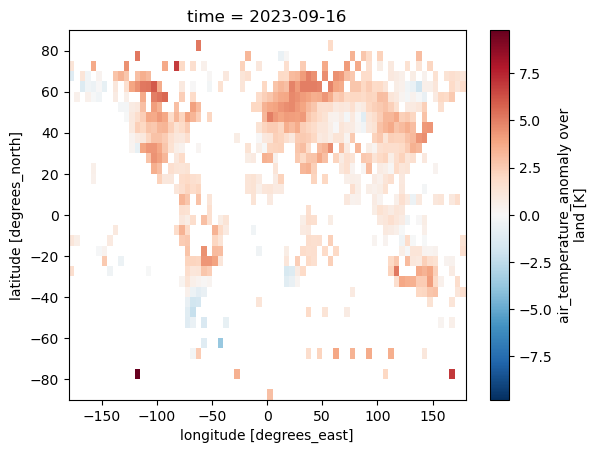

In [28]:
ds.tas[-1].plot()

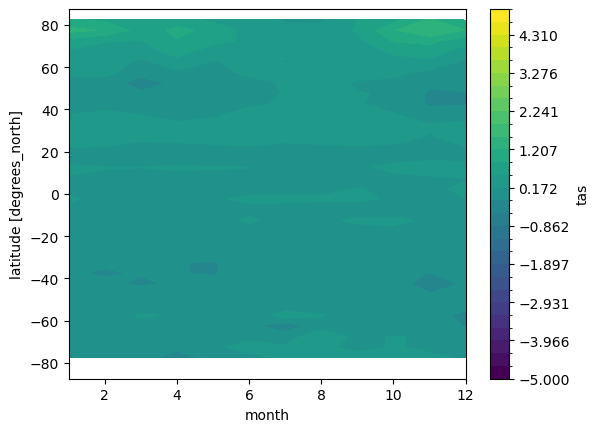

In [29]:
tas_clim = ds.tas.groupby('time.month').mean()
tas_clim.mean(dim='longitude').plot.contourf(x='month',levels=30, vmin=-5, vmax=5)

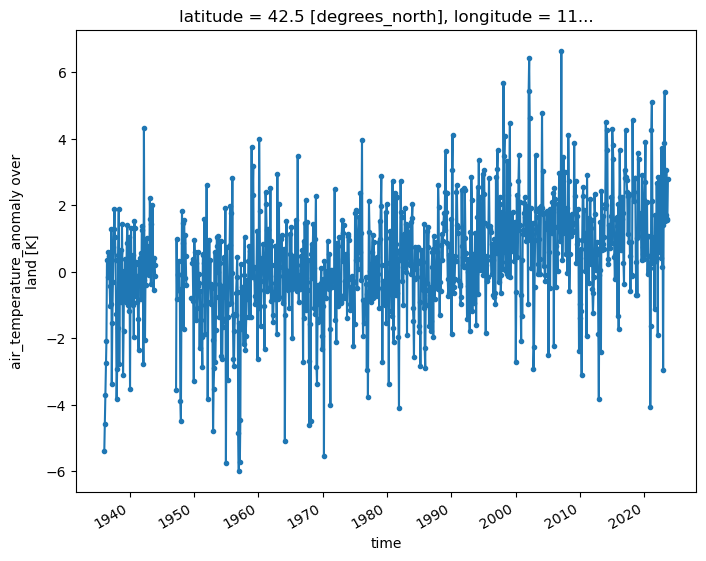

In [30]:
ds.tas.sel(longitude=116,latitude=40,method='nearest').plot(marker=".", size=6)

(array([2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00,
        8.00000e+00, 1.00000e+01, 2.00000e+01, 2.30000e+01, 5.70000e+01,
        1.06000e+02, 1.83000e+02, 2.83000e+02, 4.53000e+02, 7.43000e+02,
        1.22600e+03, 1.79900e+03, 2.72600e+03, 4.36100e+03, 7.16500e+03,
        1.19820e+04, 2.12560e+04, 4.20390e+04, 8.87200e+04, 1.95470e+05,
        3.20090e+05, 2.29648e+05, 1.12281e+05, 5.51110e+04, 2.83670e+04,
        1.55840e+04, 8.84000e+03, 5.35500e+03, 3.44000e+03, 2.15100e+03,
        1.34200e+03, 8.93000e+02, 5.02000e+02, 2.98000e+02, 1.56000e+02,
        1.09000e+02, 6.10000e+01, 3.90000e+01, 1.90000e+01, 1.60000e+01,
        5.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-21.331  , -20.49478, -19.65856, -18.82234, -17.98612, -17.1499 ,
        -16.31368, -15.47746, -14.64124, -13.80502, -12.9688 , -12.13258,
        -11.29636, -10.46014,  -9.62392,  -8.7877 ,  -7.95148,  -7.11526,
         -6.27904,  -5.44282,  -4.6066 ,  -3.7

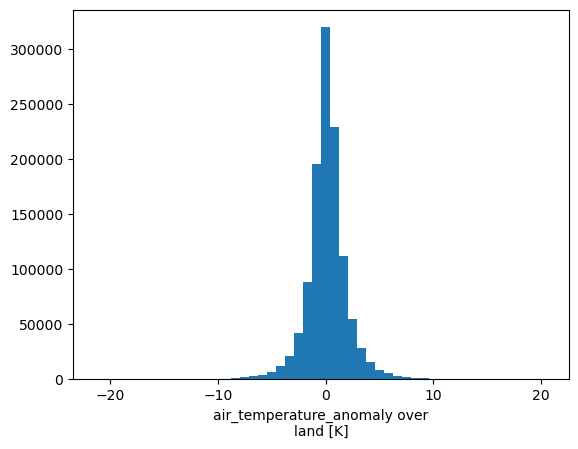

In [31]:
ds.tas.plot(bins=50)

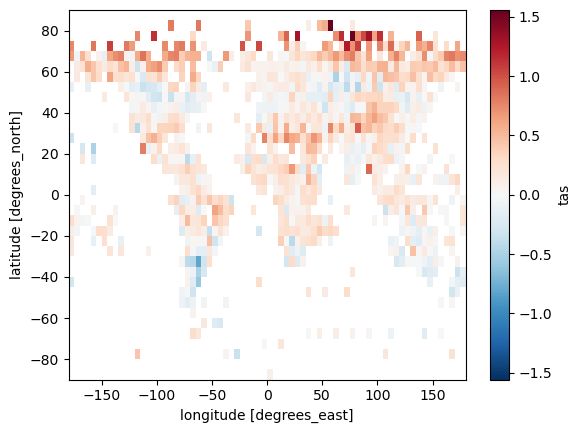

In [32]:
ds.tas.mean(dim='time').plot()

### 第三题代码运行正常，可以输出正确结果和图片，报告中也展示了输出内容和结果的分析。但是第一问没有with monthly seasonal cycle removed.
### 得分：9/10
### --------------------------------------------------------------------------------------------